In [75]:
import os
from glob import glob
from pdfminer.high_level import extract_text
import textract
import string
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [76]:
def load_files(path, file_type='pdf'):
    """
    Extract text from pdf, doc, docx files.
    """
    
    files = glob(os.path.join(path, f'*.{file_type}'))
        
    if file_type == 'pdf':
        text = ''.join(extract_text(f) for f in files)
    elif file_type in ['doc', 'docx']:
        text = ''.join([textract.process(f).decode('utf-8') for f in files])
    
    print(f'{len(files)} files have been read.')
    
    return text



def join_broken_lines(text):
    """
    Re move hyphen (-) from the end of lines and join broken words
    """
    
    lines = text.split('\n')
    
    complete_lines = []
    broken_lines = 0
    for l in lines:
        l = l.rstrip()
        if len(l) != 0:
            if l[-1] == '-':
                complete_lines.append(l[:-1])
                broken_lines += 1
            else:
                complete_lines.append(l + ' ')
    
    
    print(f'{broken_lines} lines have been connected.')
    
    return ''.join(complete_lines)



def remove_punctuations_and_numbers(text):
    """
    Remove punctuavtions and numbers
    """
    
    translator = str.maketrans('', '', string.punctuation + string.digits)
    return text.translate(translator)


def remove_stopwords(text, extra_words=[], min_length=3, download=False):
    """
    Remove stopwwords and short words and split to words
    """
    
    if download == True:
        nltk.download('stopwords')
        
    stopwords = set(nltk.corpus.stopwords.words('english')) | set(extra_words)
    
    words = text.lower().split()
    return [w for w in words if w not in stopwords and len(w) > min_length]


def create_wordcloud(words):
    """
    Create wordcloud
    """
    
    wordcloud = WordCloud(collocations=False).generate(' '.join(words))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()    

10 files have been read.
895 lines have been connected.


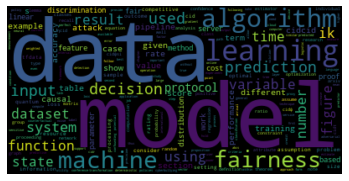

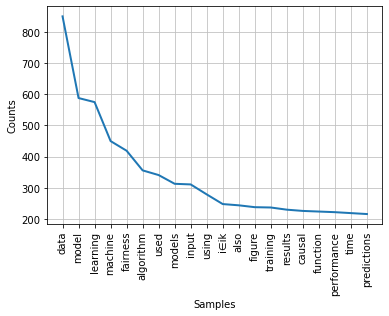

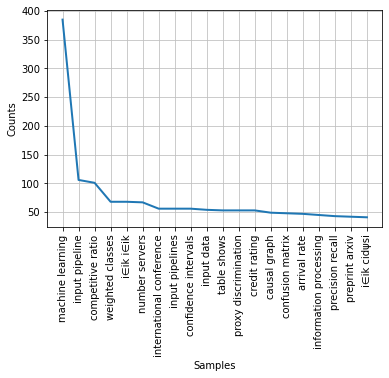

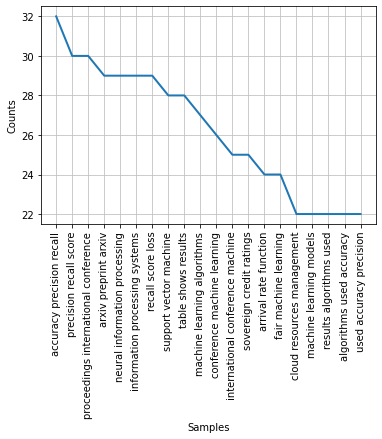

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [84]:
text = load_files('data/', 'pdf')
text = join_broken_lines(text)
text = remove_punctuations_and_numbers(text)
words = remove_stopwords(text)

# Analyze words
create_wordcloud(make_bigrams(words))

fdist = nltk.FreqDist(words)
fdist.plot(20)

# Analyze bigrams
bigrams = list([' '.join(bg) for bg in nltk.bigrams(words)])
fdist = nltk.FreqDist(bigrams)
fdist.plot(20)

# Analyze trigrams
trigrams = list([' '.join(bg) for bg in nltk.trigrams(words)])
fdist = nltk.FreqDist(trigrams)
fdist.plot(20)

